# Data analysis has been done using a similar dataset from kaggle

In [1]:
import numpy as np   # importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the datasets 
df=pd.read_csv(r"C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\CSI HACK\Another dataset\IPL Ball-by-Ball 2008-2020.csv")
pf=pd.read_csv(r"C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\CSI HACK\Another dataset\IPL Matches 2008-2020.csv")
pd.set_option('display.max_columns', None)
df.head() #observing the columns

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [3]:
pf.head() #observing the columns 

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [13]:
df.info() #observing number of null values and dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [4]:
pf.info() #observing number of null values and dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
pf['team1'].unique() #checking participating teams 

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [9]:
pf['team2'].unique()  #checking participating teams 

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [3]:
pf = pf.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)
df= df.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)
pf['team1'].nunique()

14

In [16]:
pf['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiant', 'Delhi Capitals'],
      dtype=object)

In [12]:
pf['player_of_match'].nunique() 

233

# Graph of matches played per season

c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

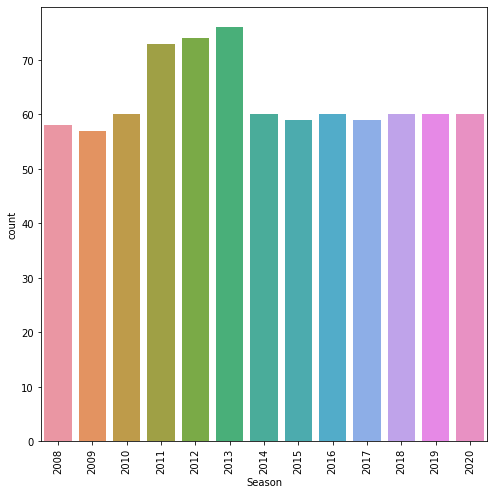

In [4]:
pf['Season'] = pd.DatetimeIndex(pf['date']).year   # matches playes per season
plt.rcParams["figure.figsize"]=(8,8)
sns.countplot(pf['Season'])
plt.xticks(rotation = 90) # mostt matches were played in 2013

# Graph of total toss wins per team

<AxesSubplot:xlabel='toss_winner'>

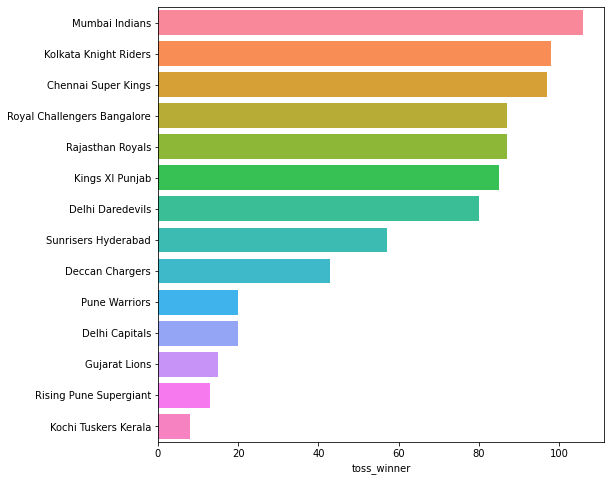

In [5]:
t = pf['toss_winner'].value_counts()   # checking toss wins per team
plt.rcParams["figure.figsize"]=(8,8)
sns.barplot(y=t.index, x=t, saturation = 1) #Mumbai INdians have the best toss winning rate 


# Graph of total wins per team

Text(0.5, 0, 'Total Wins by the teams')

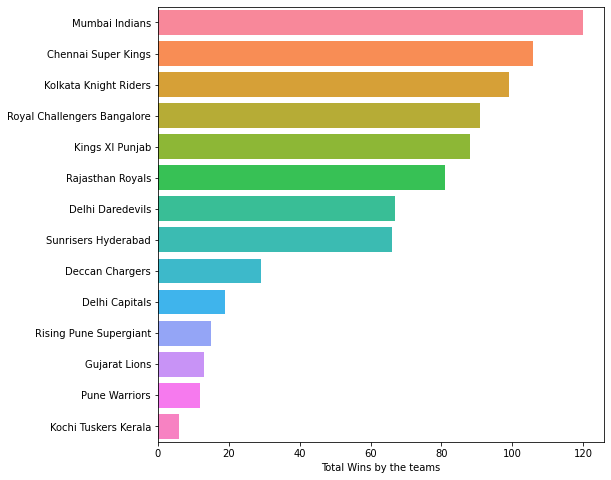

In [7]:
winner= pf['winner'].value_counts()                   #Mumbai Indians has the best winning rate 
plt.rcParams["figure.figsize"]=(8,8)
sns.barplot(y=winner.index, x=winner,saturation = 1)
plt.xlabel('Total Wins by the teams')


# Analyzing if team wins match on winning toss

c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Delhi Capitals'),
  Text(10, 0, 'Rising Pune Supergiant'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Kochi Tuskers Kerala')])

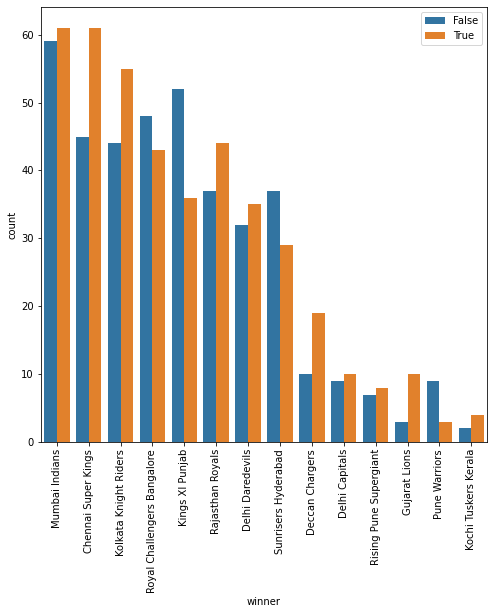

In [24]:
z= pf['toss_winner'] == pf['winner']     # match win against toss win
plt.rcParams["figure.figsize"]=(8,8)
sns.countplot(pf['winner'], hue=z, order =pf['winner'].value_counts().index)  
plt.xticks(rotation = 90)
# One has a higher probability of winning match if one wins the toss 

In [25]:
df['dismissal_kind'].unique()  

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [28]:
bowled= ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets_count = df[df['dismissal_kind'].isin(bowled)]
wickets_count['dismissal_kind'].unique()

array(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled',
       'hit wicket'], dtype=object)

# Plotting total number of wickets taken by players in all seasons 

<AxesSubplot:xlabel='count', ylabel='bowler'>

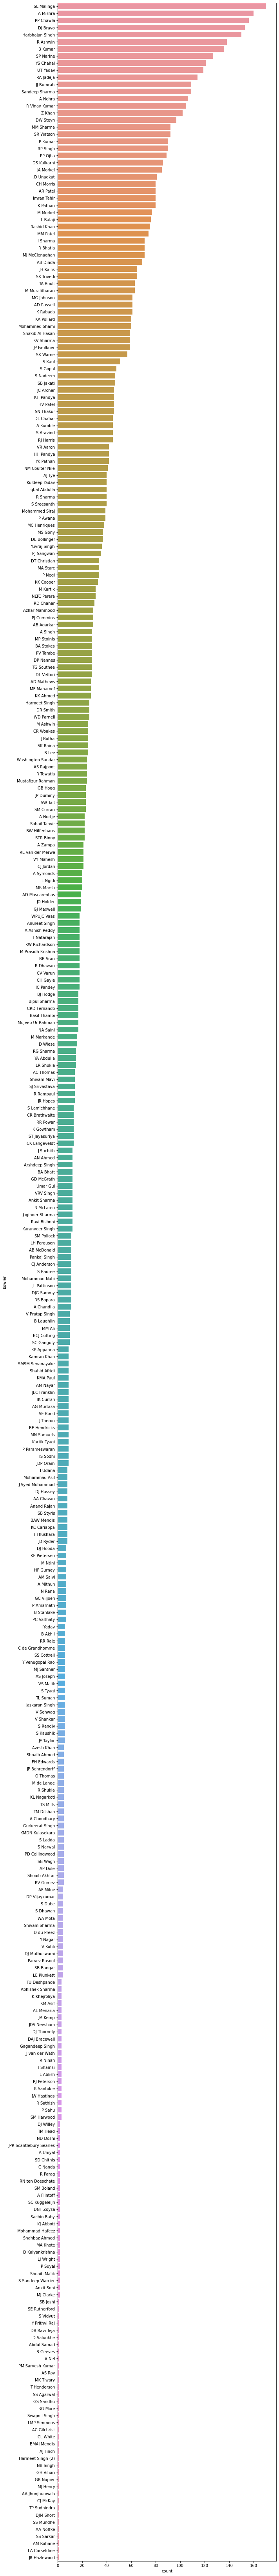

In [30]:
plt.rcParams["figure.figsize"]=(10,120) 
sns.countplot(y=wickets_count['bowler'],order = wickets_count['bowler'].value_counts().index)
#  SL Malinga, A mishra or PP Chawla are not playing. So, DJ Bravo of CSK might win the purple cap. 

In [34]:
runners= df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runners.columns = ['Batsman', 'Runs']
runners =runners.sort_values(by = 'Runs', ascending = False).head(10).reset_index().drop('index', axis=1)


# Plotting total runs scored by all players in all seasons 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'DA Warner'),
  Text(3, 0, 'RG Sharma'),
  Text(4, 0, 'S Dhawan'),
  Text(5, 0, 'AB de Villiers'),
  Text(6, 0, 'CH Gayle'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'RV Uthappa'),
  Text(9, 0, 'G Gambhir')])

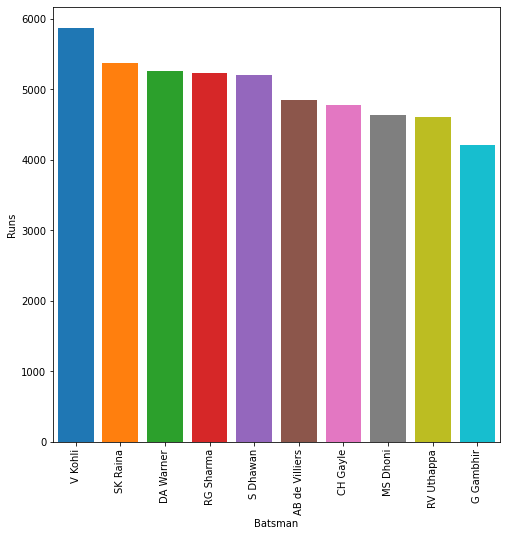

In [35]:
plt.rcParams["figure.figsize"]=(8,8)   
sns.barplot(x=runners['Batsman'],y=runners['Runs'],saturation=1) 
plt.xticks(rotation=90)
# Virat Kohli might win the orange cap

In [8]:
#conclusions are drawn from the winning rate, highest runs scored and the highest wickets taken graphs. 

# Final Conclusions:
(.) Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders and Royal Challengers Bangalore will qualify for play-offs.

(.) Mumbai Indians will win the trophy in the Tata IPL 2022.

(.) Virat Kohli will win the orange cap. DJ Bravo will win the purple cap. 

(.) RG Sharma, Jasprit Bumrah are the crucial players of Mumbai Indians. 
